# Data Preprocessing & Exploratory Data Analysis:

In [ ]:
 #Step-1: Importing libraries and datasets

# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Import Dataset

df = pd.read_csv("/content/drive/MyDrive/Data Science Projects/Customer Churn Analysis (Classification)/Customer Churn Telecom Industry/churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Check data types and missing values
print("Data Types:")
print(df.dtypes)
print("Missing Values:")
print(df.isnull().sum())

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling  

*** Note:***

It seems that there are some values in the 'TotalCharges' column that are not valid for conversion to float, likely because they contain non-numeric characters or are empty strings. You need to handle these cases before converting the column to float.

Here's how you can handle it:

1. Convert the empty strings to NaN (missing values).
2. Convert the column to numeric, which will automatically handle NaN values.
3. Finally, convert the NaN values to 0 or handle them according to your specific requirements.

This following code will first replace empty strings with NaN, then convert the column to numeric, and finally replace NaN values with 0. Adjust the handling of NaN values according to your specific needs.

In [ ]:
# Fixing the data type of Total Charges Column from object to float

# Assuming your DataFrame is named df and the column is named 'TotalCharges'
# Convert empty strings to NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA)

# Convert the column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Convert NaN values to 0, if needed
df['TotalCharges'] = df['TotalCharges'].fillna(0)



In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Loop through each categorical column
for column in categorical_columns:
    # Print the column name and the number of unique classes
    print(f"Column: {column}")
    print(f"Number of unique classes: {df[column].nunique()}")

    # Print the value counts for each unique class
    print("Value counts:")
    print(df[column].value_counts())

    # Add a separator for better readability
    print("-" * 30)


Column: customerID
Number of unique classes: 7043
Value counts:
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
------------------------------
Column: gender
Number of unique classes: 2
Value counts:
Male      3555
Female    3488
Name: gender, dtype: int64
------------------------------
Column: Partner
Number of unique classes: 2
Value counts:
No     3641
Yes    3402
Name: Partner, dtype: int64
------------------------------
Column: Dependents
Number of unique classes: 2
Value counts:
No     4933
Yes    2110
Name: Dependents, dtype: int64
------------------------------
Column: PhoneService
Number of unique classes: 2
Value counts:
Yes    6361
No      682
Name: PhoneService, dtype: int64
------------------------------
Column: MultipleLines
Number of unique classes: 3
Value counts:
No                  3390
Yes        

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['customerID']
df = df.drop(columns=columns_to_drop)


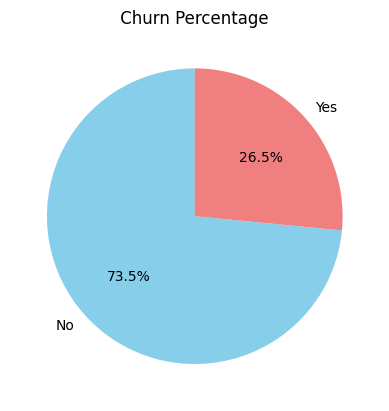

In [ ]:
# Count the occurrences of 1s and 0s in the column
value_counts = df['Churn'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

# Add a title
plt.title(' Churn Percentage ')

# Display the pie chart
plt.show()

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


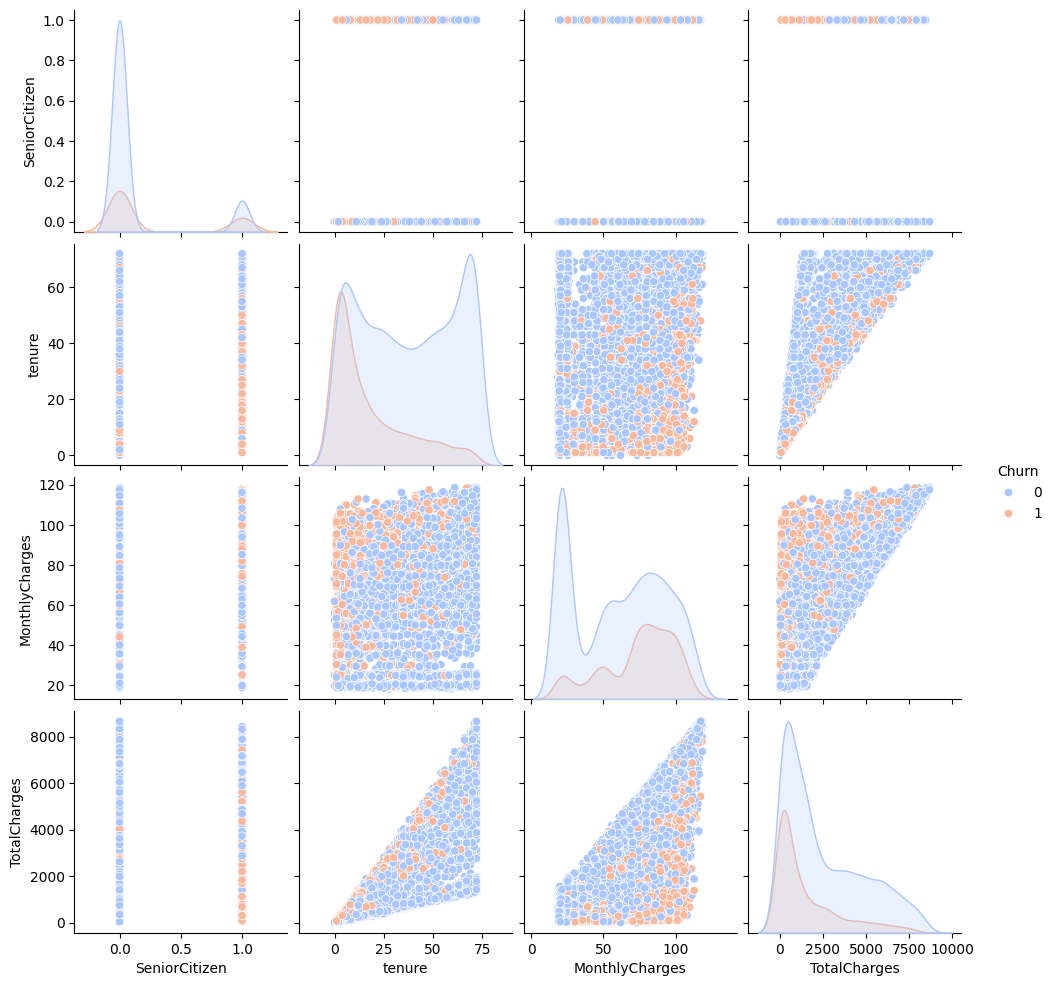

In [ ]:
sns.pairplot(df, hue='Churn',palette='coolwarm')

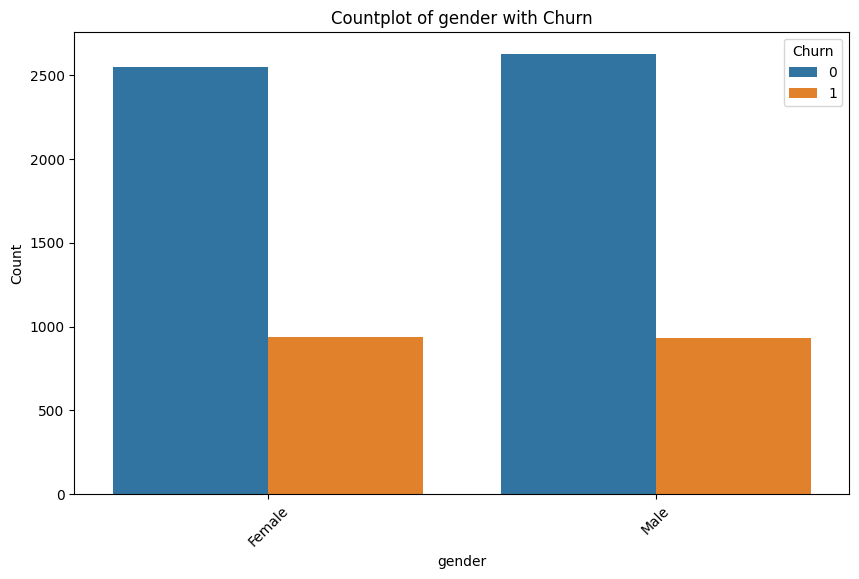

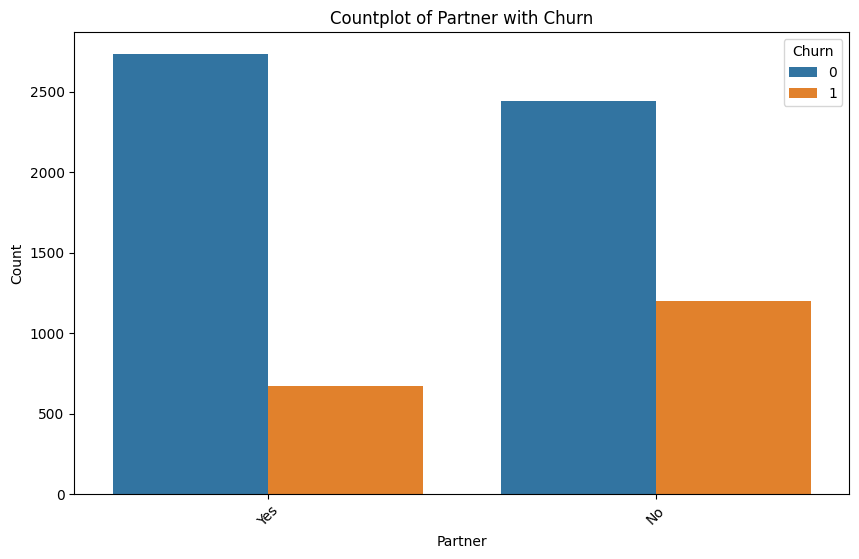

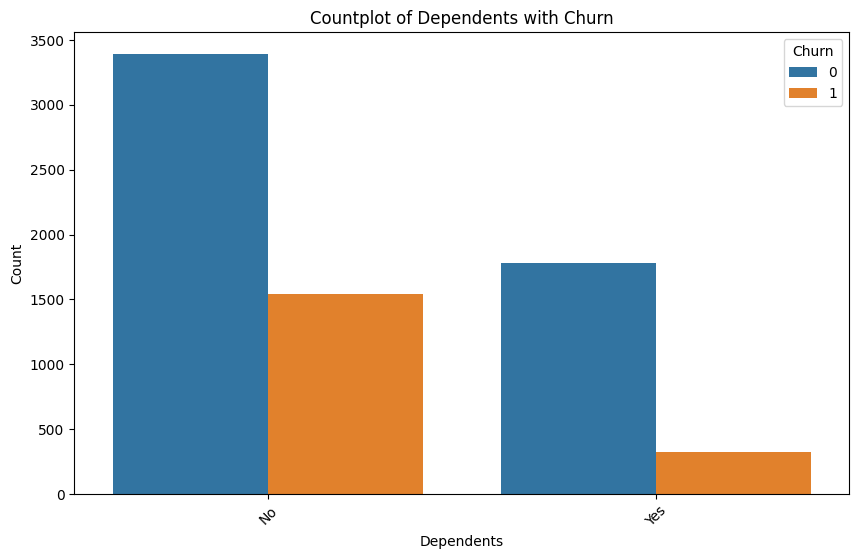

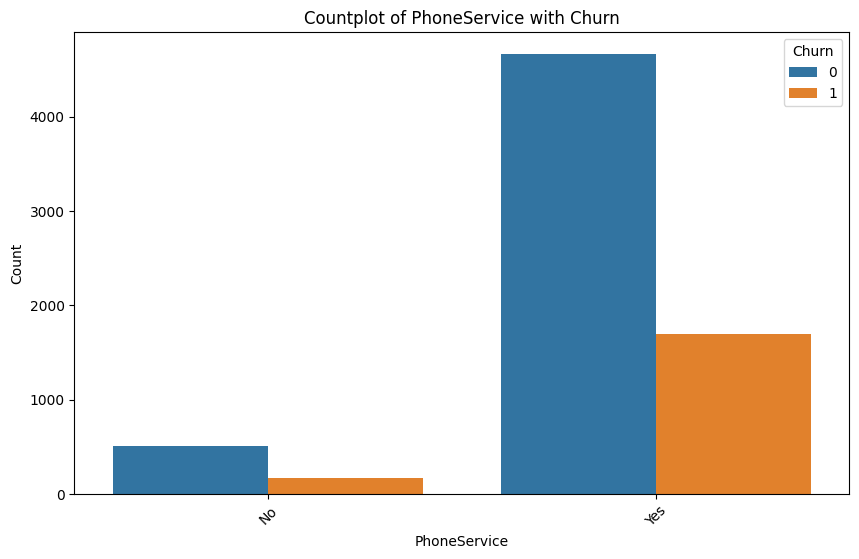

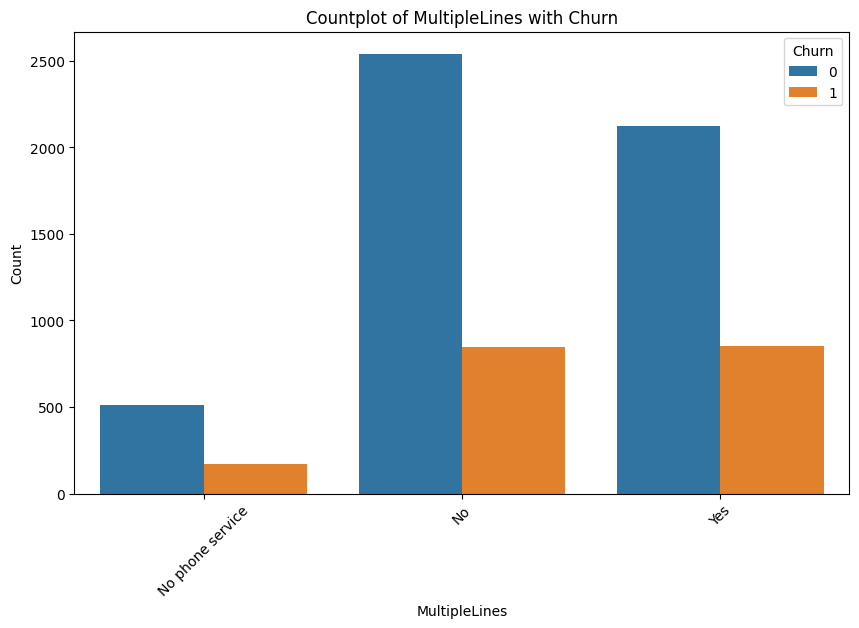

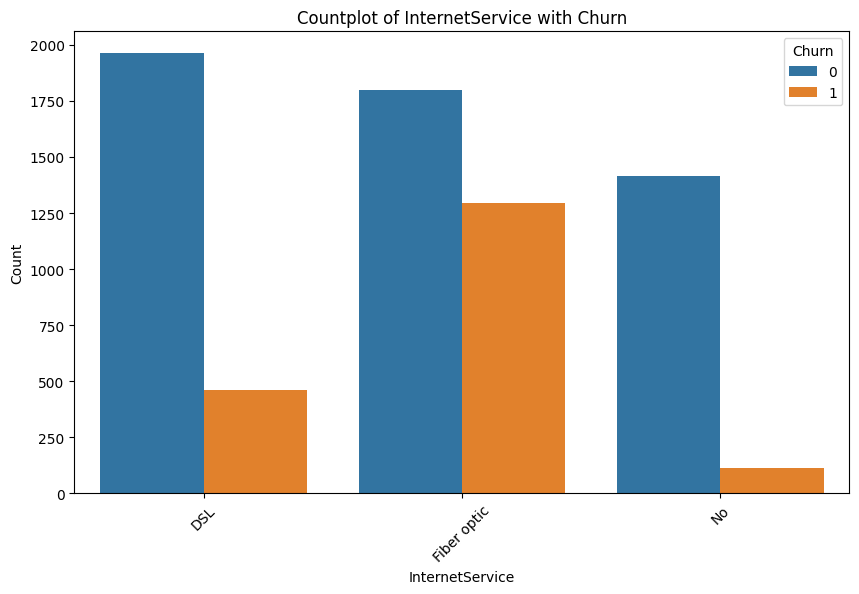

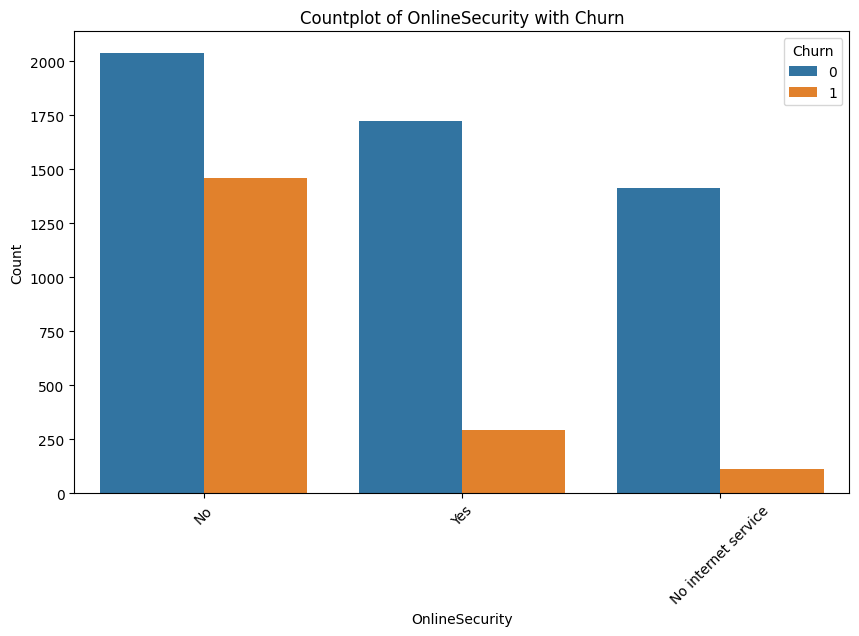

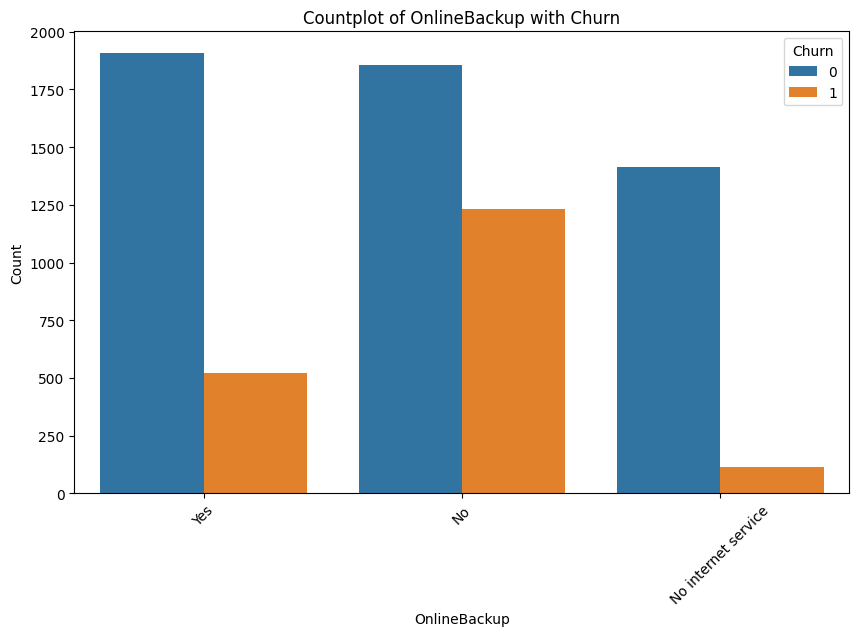

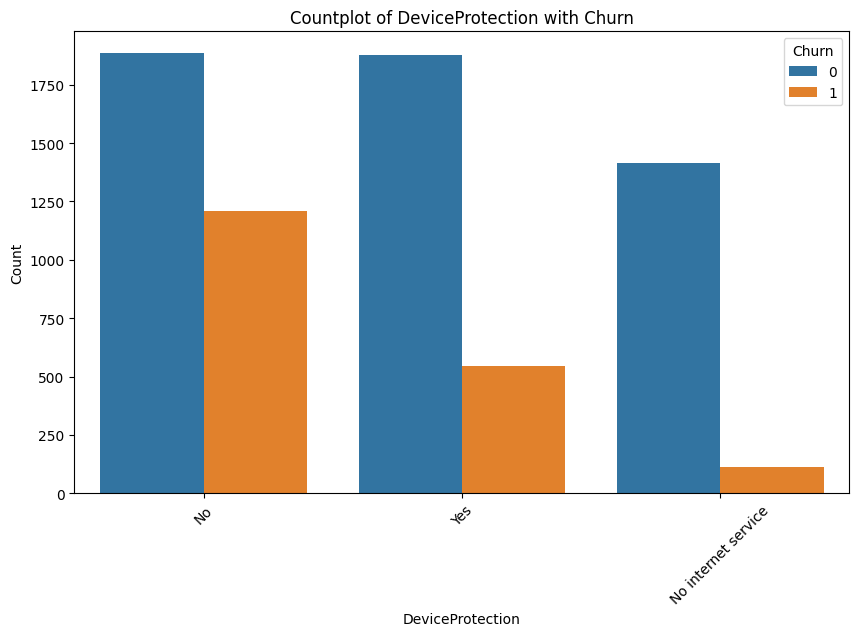

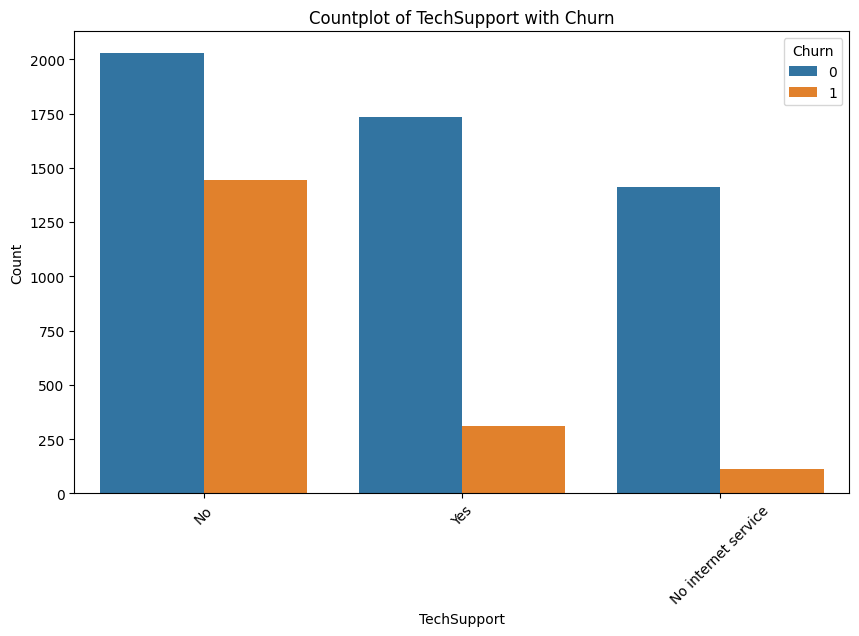

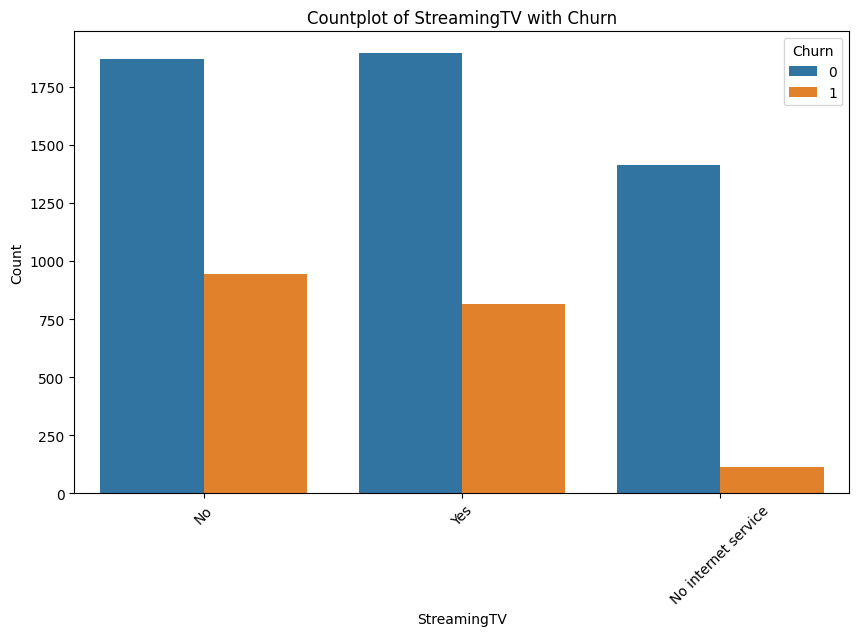

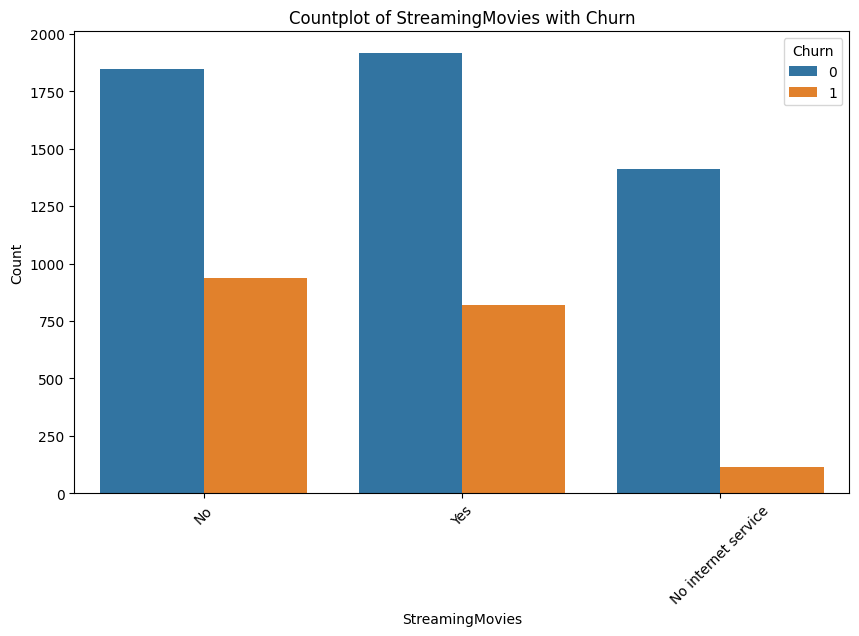

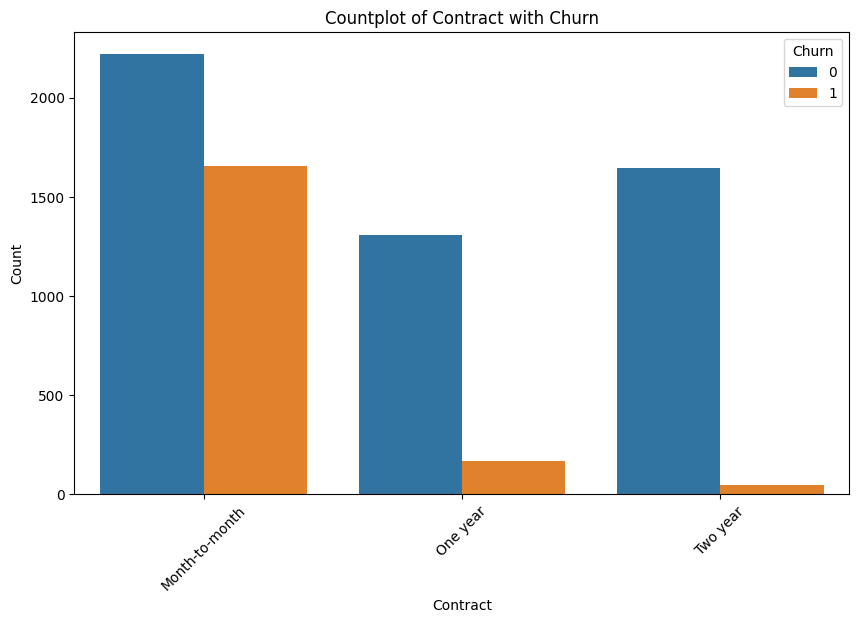

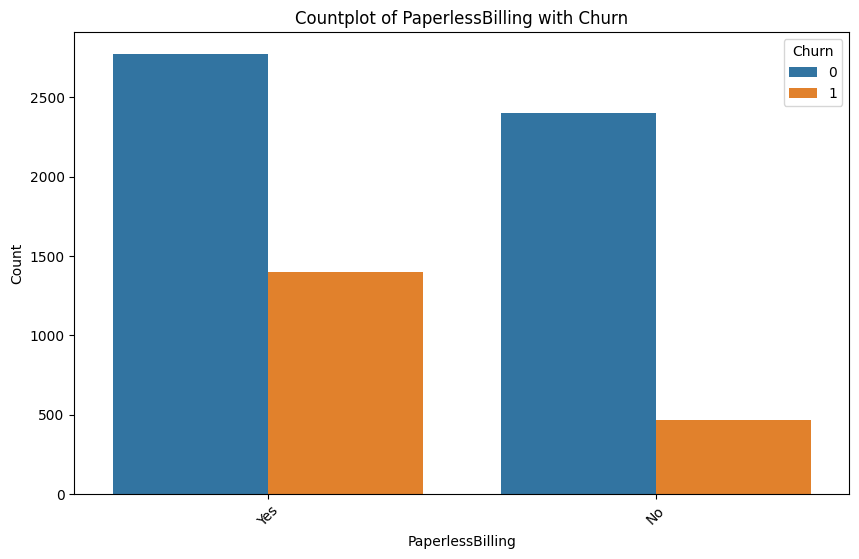

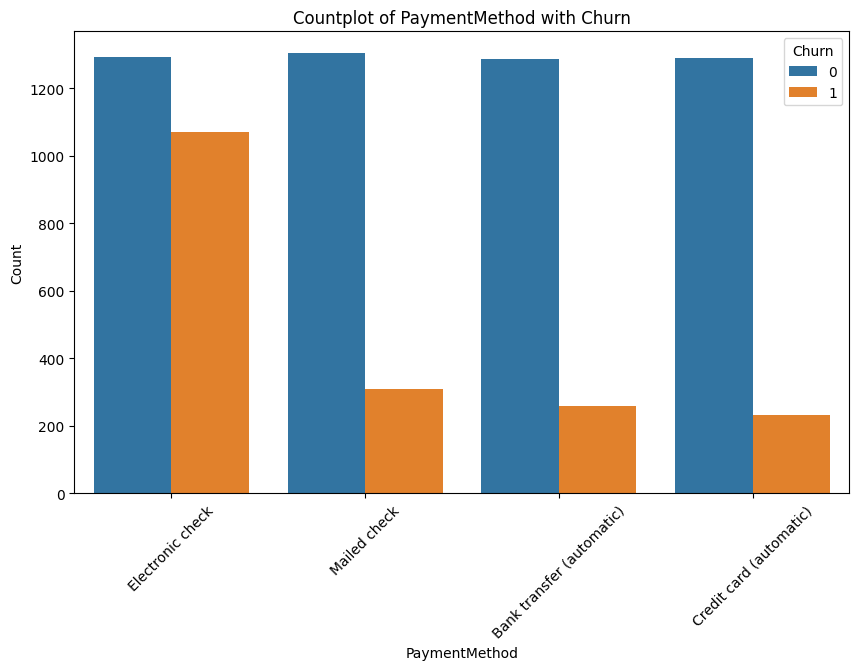

In [ ]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Loop through each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='Churn')
    plt.title(f'Countplot of {column} with Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')
    plt.show()


<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


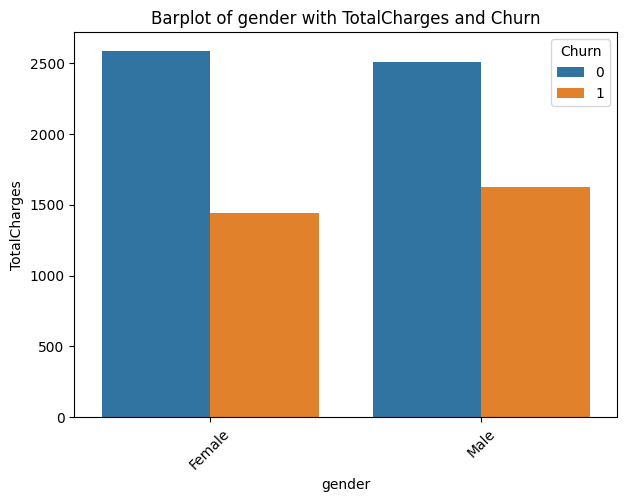

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


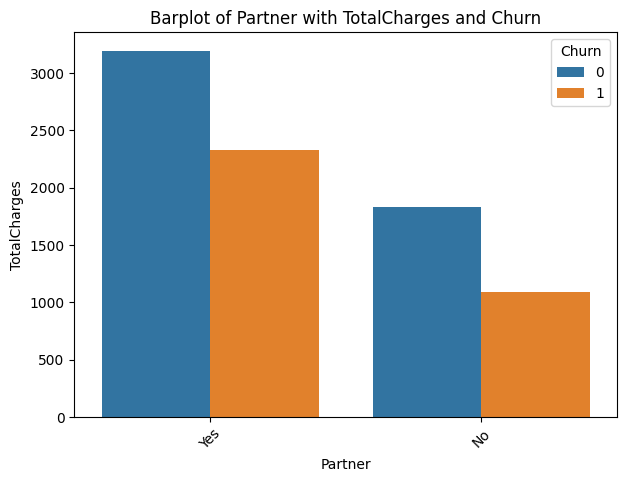

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


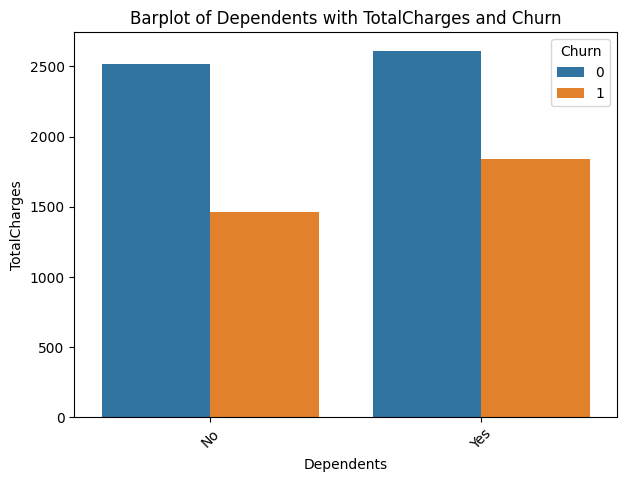

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


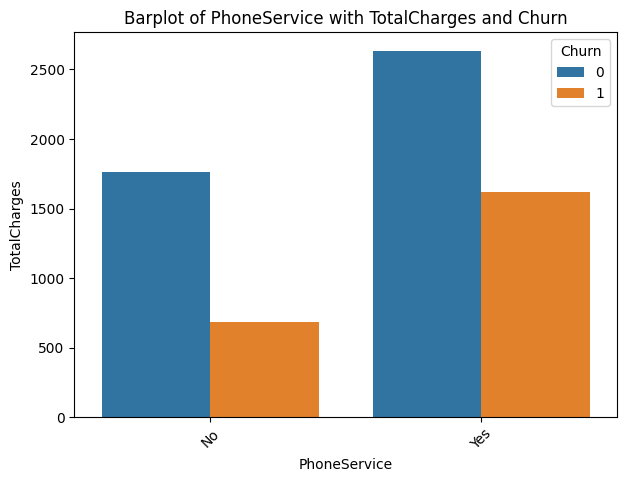

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


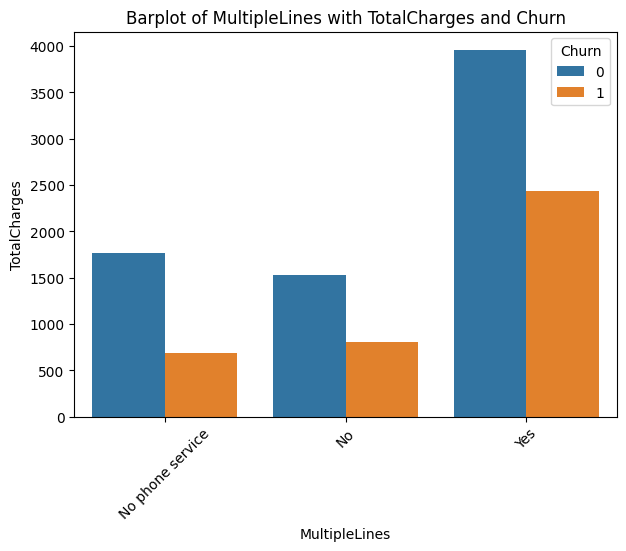

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


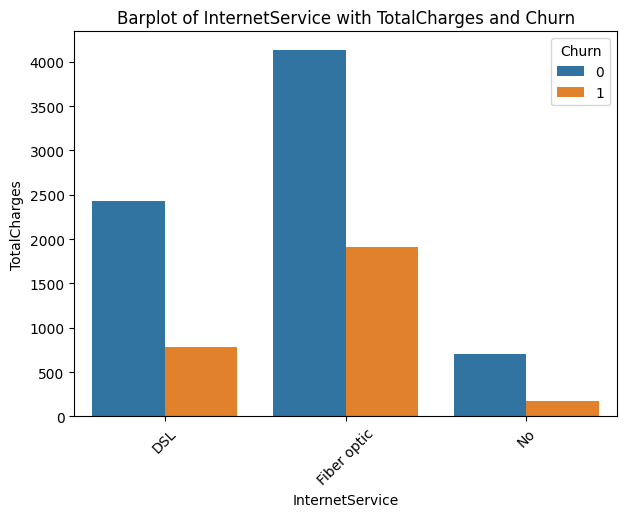

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


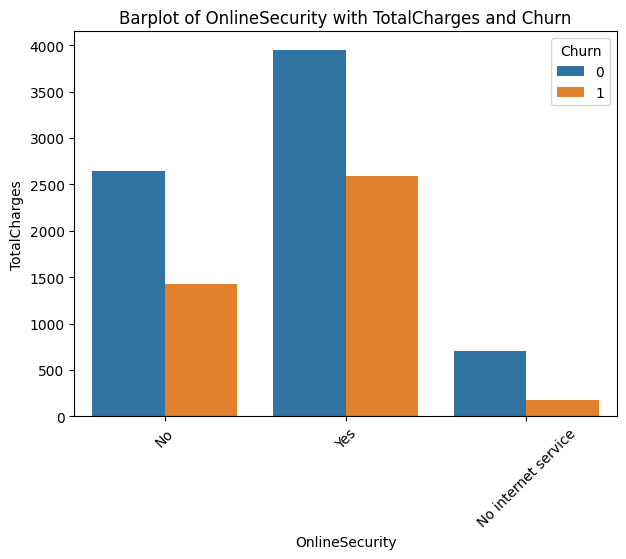

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


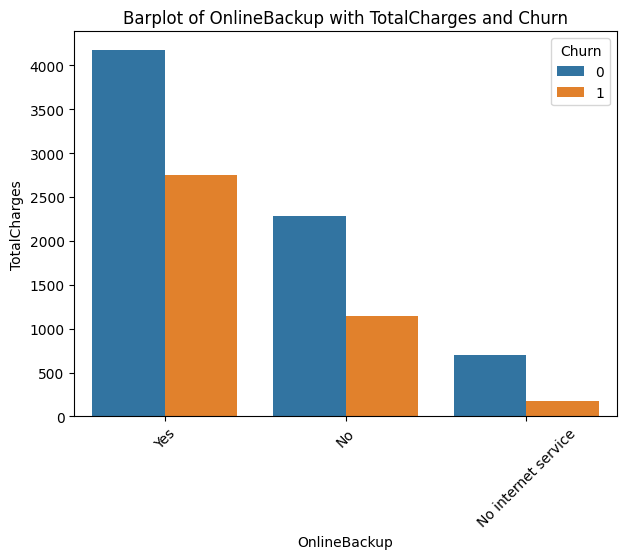

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


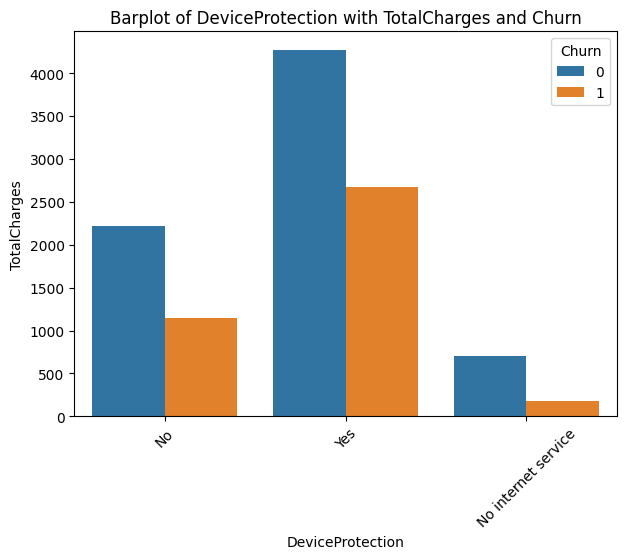

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


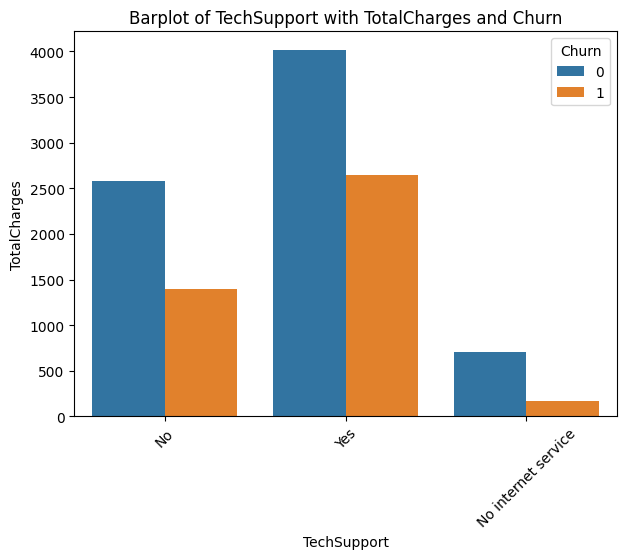

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


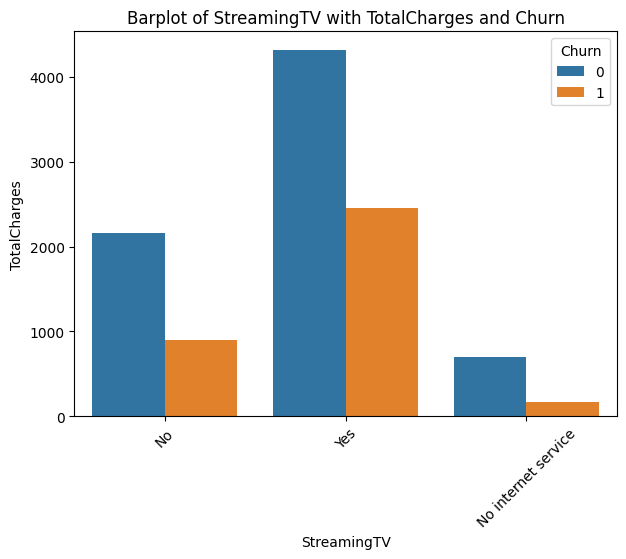

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


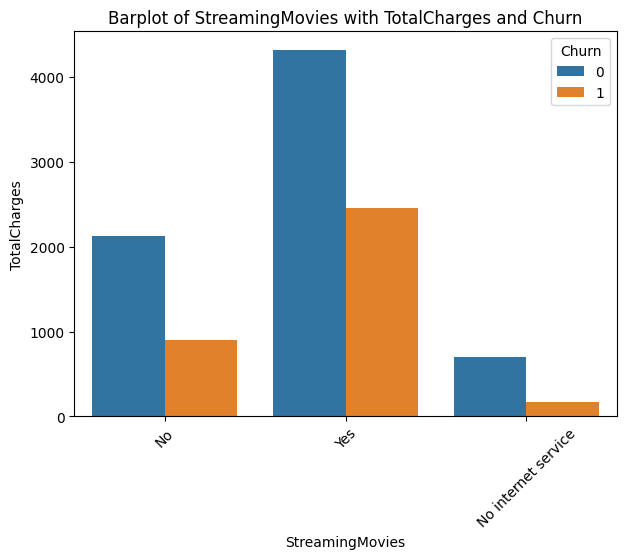

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


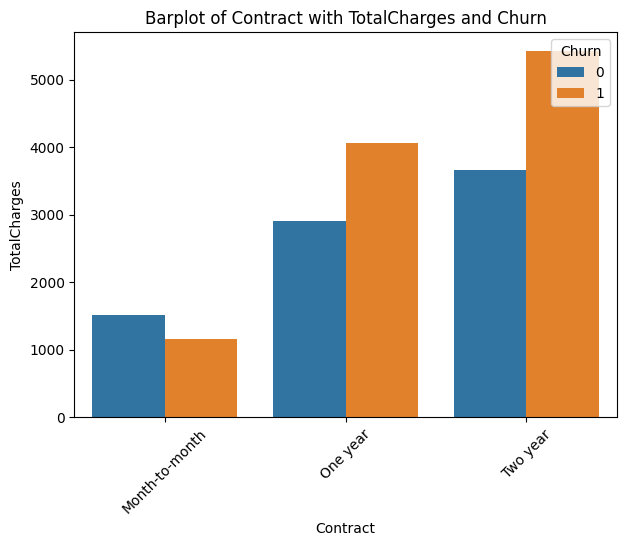

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


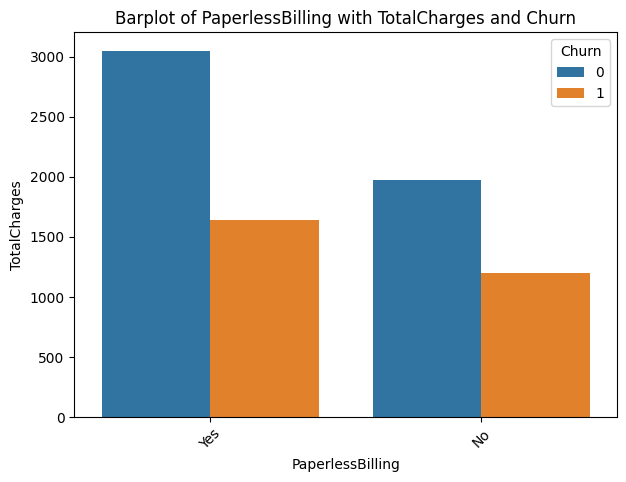

<ipython-input-26-9fa47219a614>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)


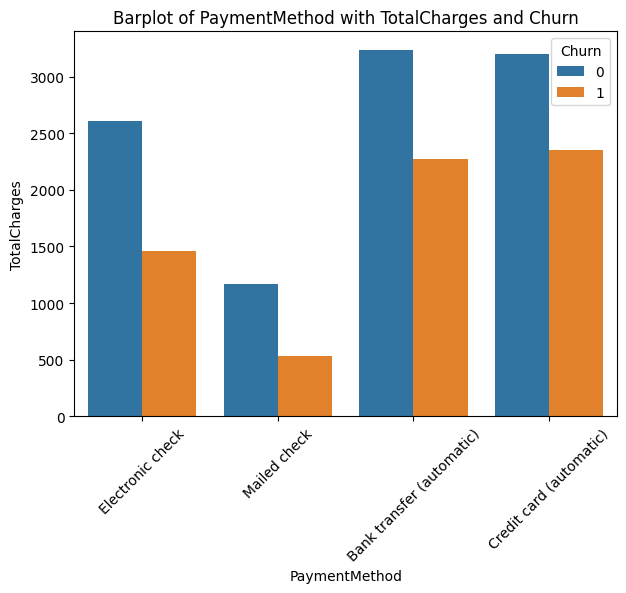

In [ ]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Loop through each categorical column
for column in categorical_columns:
    plt.figure(figsize=(7, 5))
    sns.barplot(data=df, x=column, y='TotalCharges', hue='Churn', ci=None)
    plt.title(f'Barplot of {column} with TotalCharges and Churn')
    plt.xlabel(column)
    plt.ylabel('TotalCharges')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')
    plt.show()


# Feature Engineering:


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Modifying the Churn Column

# Converting Yes and No to 1s and 0s in 'Churn' column.

df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='Churn'), df['Churn'], test_size=0.20, random_state=42)


# Identify categorical and numerical columns
categorical_columns = x_train.select_dtypes(include=['object']).columns
numerical_columns = x_train.select_dtypes(include=['number']).columns

# Preprocessing with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns),
        ('lda', LDA(n_components=1), numerical_columns)
    ])

# Fit and transform the training set
x_train_preprocessed = preprocessor.fit_transform(x_train, y_train)

# Transform the test set
x_test_preprocessed = preprocessor.transform(x_test)

# Now x_train_preprocessed and x_test_preprocessed are ready for further processing

x_train_lda = x_train_preprocessed
x_test_lda = x_test_preprocessed

# Machine Learning Modeling:

# 1. Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



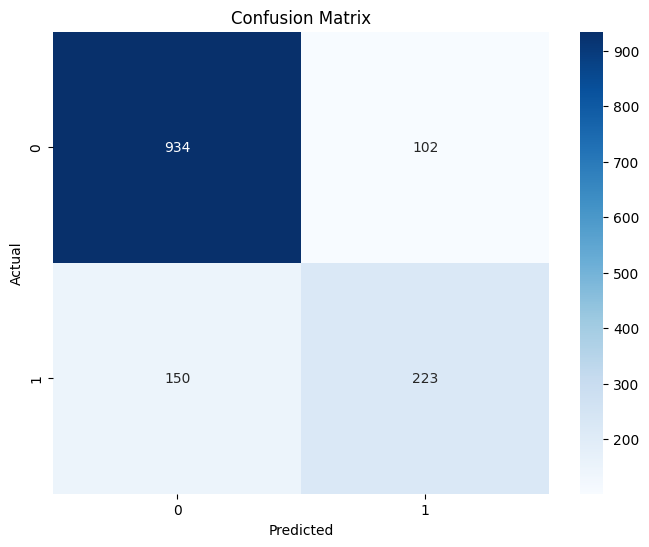

In [ ]:
# train Logistic Regression with training set

from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()
LGR.fit(x_train_lda, y_train)


# Predict New Result with test set

y_pred_LGR = LGR.predict(x_test_lda)

# Classification Report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_LGR))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_LGR)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


###Hyper Parameter Tuning of Logistic Regression Model:

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

Best Parameters: {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



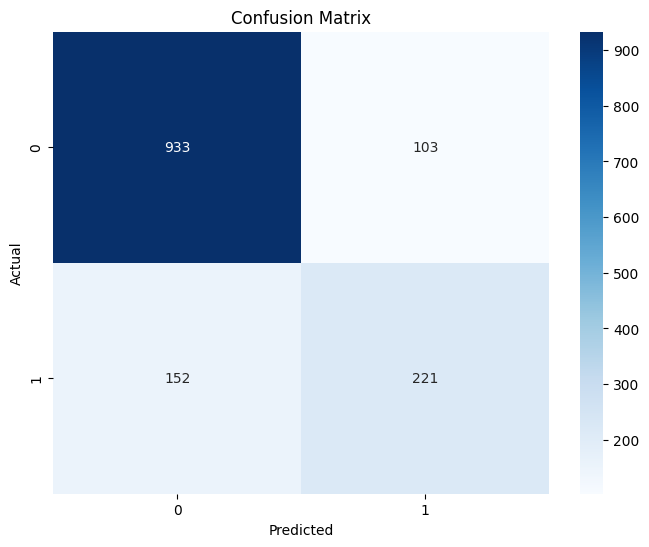

In [ ]:
# Perform Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500,1000],
    'class_weight': [None, 'balanced']
}


# Perform grid search
grid_search = GridSearchCV(estimator=LGR, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_lda, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_lgr_model = LogisticRegression(**best_params)

# Train the final model on the entire training set
best_lgr_model.fit(x_train_lda, y_train)

# Predict on the future dataset
y_pred_LGR = best_lgr_model.predict(x_test_lda)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_LGR))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_LGR)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# K-Fold Cross Validation:


from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_lgr_model, x_train_lda, y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation accuracy scores:", cv_scores)

# Print the mean and standard deviation of the F1 scores
print("Mean accuracy score:", cv_scores.mean())
print("Standard deviation of accuracy score:", cv_scores.std())



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Cross-validation accuracy scores: [0.7606383  0.81560284 0.81914894 0.80851064 0.79573712 0.78507993
 0.80817052 0.80994671 0.80284192 0.79396092]
Mean accuracy score: 0.7999637831777584
Standard deviation of accuracy score: 0.01637960238044427


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# 2. XGBoost Classifier Model:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.53      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



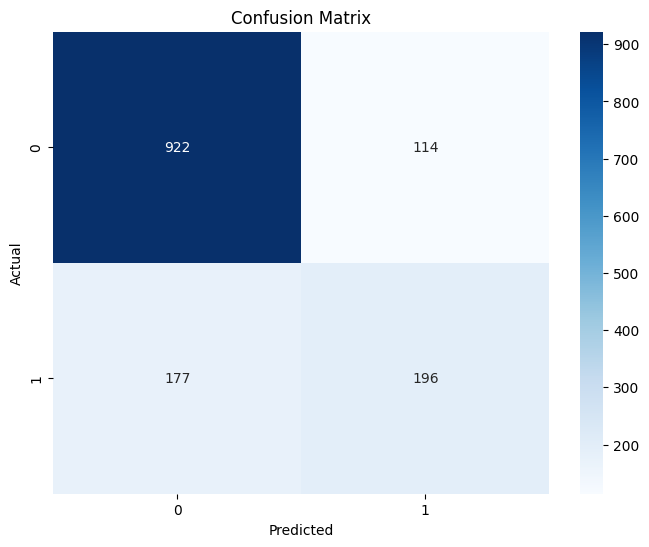

In [ ]:
# Implementing XGBoost on the training set

from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(x_train_lda, y_train)

# Predict New Result with test set

y_pred_XGBC = XGBC.predict(x_test_lda)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_XGBC))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_XGBC)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



### Hyper Parameter tuning of XGBoost Classifier Model:

Best Parameters: {'gamma': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1036
           1       0.70      0.55      0.62       373

    accuracy                           0.82      1409
   macro avg       0.78      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



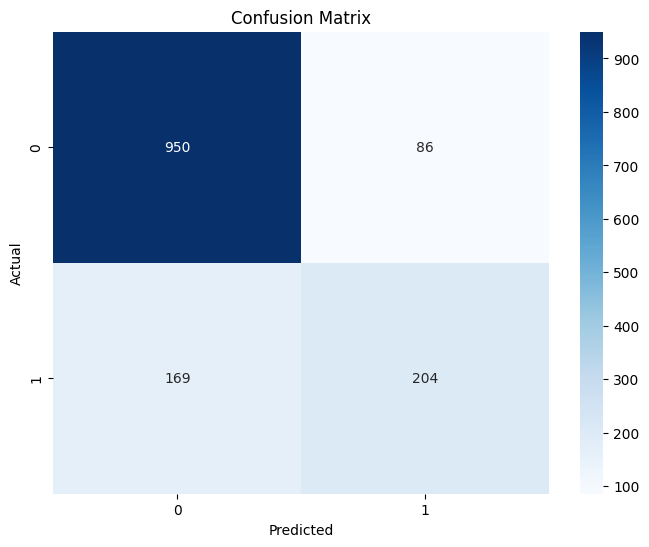

In [ ]:
# Perform Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7,9,11],
    'n_estimators': [300,400,500],
    'gamma': [0, 0.1, 0.5, 1]
}

# Perform grid search
grid_search = GridSearchCV(estimator=XGBC, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_lda, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_xgb_model = XGBClassifier(**best_params)

# Train the final model on the entire training set
best_xgb_model.fit(x_train_lda, y_train)

# Predict on the future dataset
y_pred_XGBC = best_xgb_model.predict(x_test_lda)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_XGBC))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_XGBC)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# K-Fold Cross Validation:


from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_xgb_model, x_train_lda, y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation accuracy scores:", cv_scores)

# Print the mean and standard deviation of the F1 scores
print("Mean accuracy score:", cv_scores.mean())
print("Standard deviation of accuracy score:", cv_scores.std())



Cross-validation accuracy scores: [0.77659574 0.80141844 0.82269504 0.79787234 0.79573712 0.78863233
 0.80461812 0.79218472 0.81172291 0.78685613]
Mean accuracy score: 0.7978332892432889
Standard deviation of accuracy score: 0.01249962426700636


# 3. AdaBoost Model:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



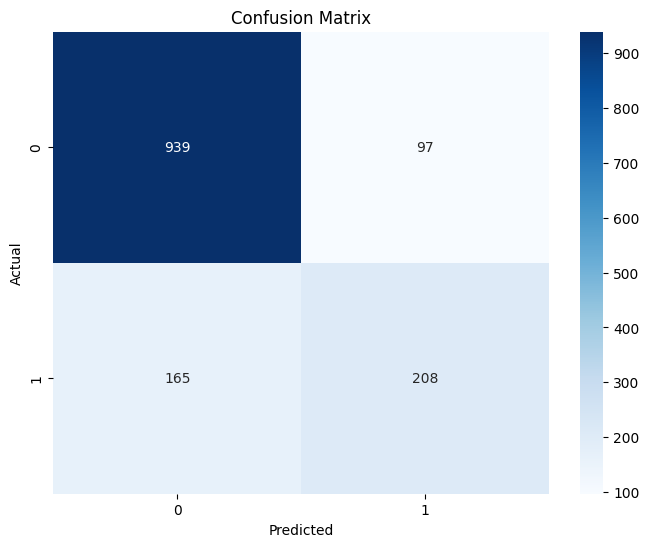

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost Classifier
abc = AdaBoostClassifier()

# Train the model on the training set
abc.fit(x_train_lda, y_train)

# Predict on the test set
y_pred_abc = abc.predict(x_test_lda)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_abc))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_abc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Hyper Parameter Tuning of AdaBoost Model:

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 450}
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



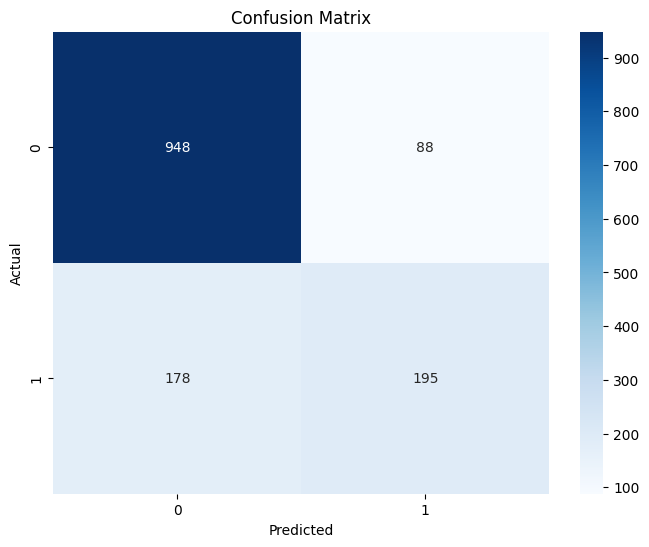

In [ ]:
# Perform Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200,300,350,375,400,450,500],
    'learning_rate': [0.01, 0.1, 0.05,1.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=abc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_lda, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_adaboost_model = AdaBoostClassifier(**best_params)

# Train the final model on the entire training set
best_adaboost_model.fit(x_train_lda, y_train)

# Predict on the future dataset
y_pred_abc = best_adaboost_model.predict(x_test_lda)


# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_abc))

# Create a heatmap of Confusion Matrix
cm = confusion_matrix(y_test, y_pred_abc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# K-Fold Cross Validation:


from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_adaboost_model, x_train_lda, y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation accuracy scores:", cv_scores)

# Print the mean and standard deviation of the F1 scores
print("Mean accuracy score:", cv_scores.mean())
print("Standard deviation of accuracy score:", cv_scores.std())



Cross-validation accuracy scores: [0.7748227  0.79964539 0.82269504 0.79964539 0.79396092 0.78863233
 0.80106572 0.79218472 0.81172291 0.79218472]
Mean accuracy score: 0.7976559842787498
Standard deviation of accuracy score: 0.012331596242074932


# 4. LightGBM Model:

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



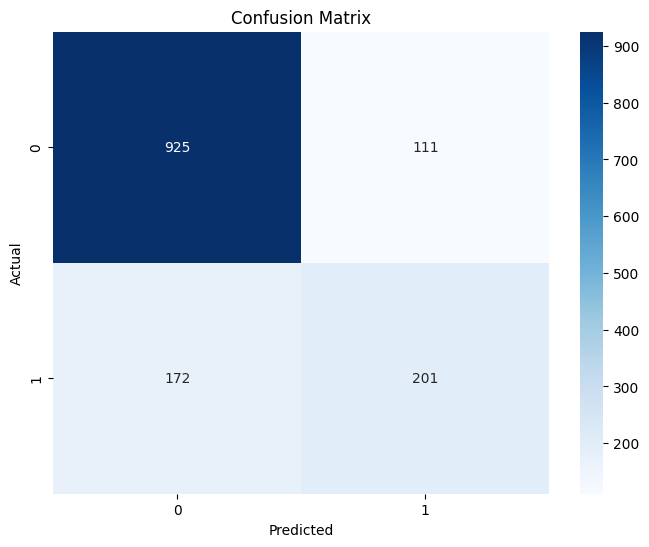

In [ ]:
from lightgbm import LGBMClassifier

# Initialize the LightGBM Classifier
lgbm = LGBMClassifier()

# Train the model on the training set
lgbm.fit(x_train_lda, y_train)

# Predict on the test set
y_pred_lgbm = lgbm.predict(x_test_lda)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_lgbm))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_lgbm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Hyper Parameter Tuning of LightGBM Model:

[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

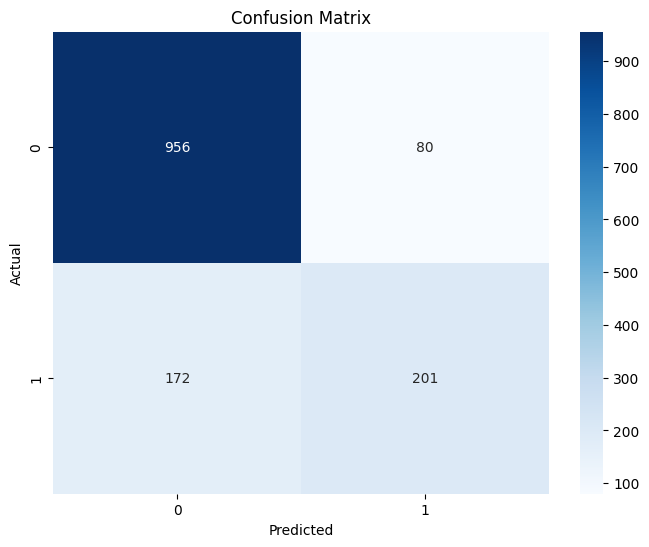

In [ ]:
# Perform Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search including num_leaves
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 50],
    'n_estimators': [50, 100, 200],
    'min_child_samples': [20, 50, 100],
    'min_child_weight': [0.001, 0.01, 0.1],

}

# Perform grid search
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_lda, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_lgbm_model = LGBMClassifier(**best_params)

# Train the final model on the entire training set
best_lgbm_model.fit(x_train_lda, y_train)

# Predict on the future dataset
y_pred_lgbm = best_lgbm_model.predict(x_test_lda)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test, y_pred_lgbm))

# Create a heatmap of Confusion Matrix

cm = confusion_matrix(y_test,y_pred_lgbm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
# K-Fold Cross Validation:


from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_lgbm_model, x_train_lda, y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation accuracy scores:", cv_scores)

# Print the mean and standard deviation of the F1 scores
print("Mean accuracy score:", cv_scores.mean())
print("Standard deviation of accuracy score:", cv_scores.std())



[LightGBM] [Info] Number of positive: 1346, number of negative: 3724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265483 -> initscore=-1.017661
[LightGBM] [Info] Start training from score -1.017661
[LightGBM] [Info] Number of positive: 1346, number of negative: 3724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265483 -> initscore=-1.017661
[LightGBM] [Info] Start training from score -1.017661
[LightGBM] [Info] Numb

# 5. Random Forest Model:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



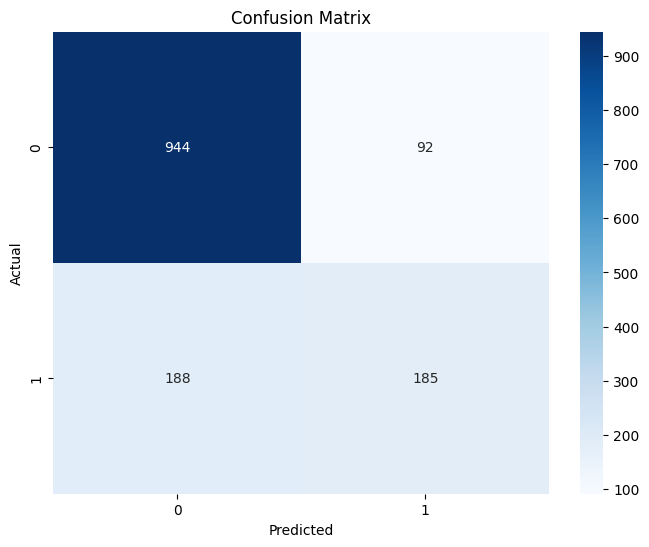

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Train the model on the training set
rf.fit(x_train_lda, y_train)

# Predict on the test set
y_pred_rf = rf.predict(x_test_lda)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_rf))

# Create a heatmap of Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search

param_grid = {
    'n_estimators': [300,400,500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,5, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_lda, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_rf_model = RandomForestClassifier(**best_params)

# Train the final model on the entire training set
best_rf_model.fit(x_train_lda, y_train)




Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 400}


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=400)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.52      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



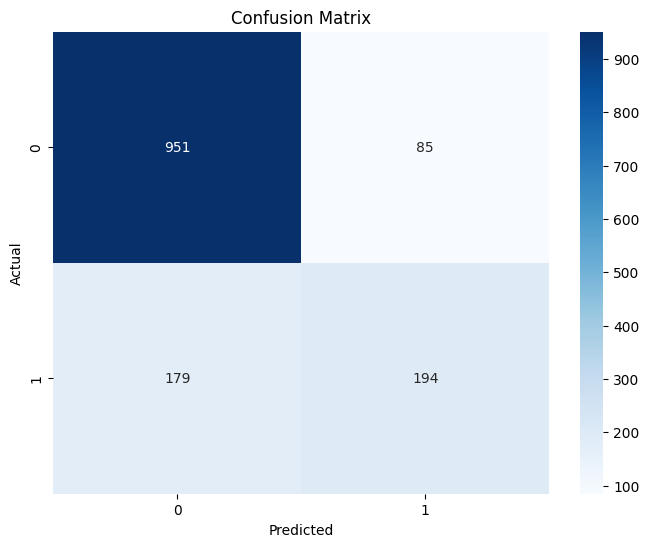

In [20]:

# Predict on the future dataset
y_pred_rf = best_rf_model.predict(x_test_lda)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_rf))

# Create a heatmap of Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# K-Fold Cross Validation:


from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_rf_model, x_train_lda, y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation accuracy scores:", cv_scores)

# Print the mean and standard deviation of the F1 scores
print("Mean accuracy score:", cv_scores.mean())
print("Standard deviation of accuracy score:", cv_scores.std())



Cross-validation accuracy scores: [0.7748227  0.80141844 0.82446809 0.79964539 0.79040853 0.78863233
 0.80461812 0.79218472 0.81172291 0.79218472]
Mean accuracy score: 0.7980105942078278
Standard deviation of accuracy score: 0.013027952113263266


# Stochastic Gradient Descent Classifier:

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1036
           1       0.56      0.70      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409



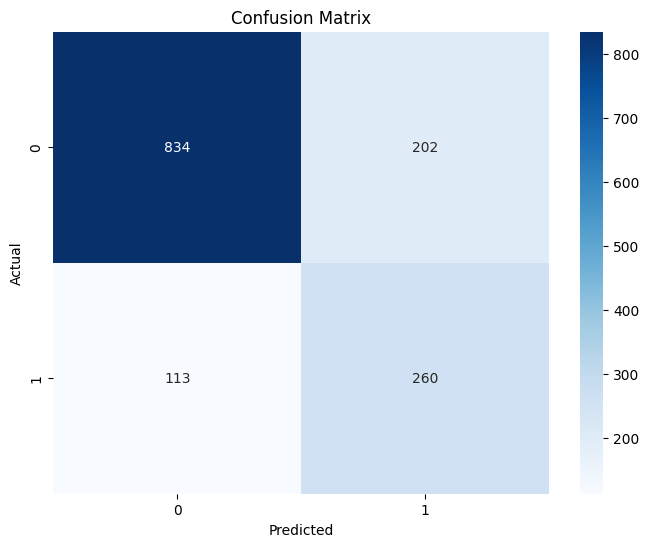

In [21]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGD Classifier
sgd = SGDClassifier()

# Train the model on the training set
sgd.fit(x_train_lda, y_train)

# Predict on the test set
y_pred_sgd = sgd.predict(x_test_lda)

# Evaluate the performance of the model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_sgd))

# Create a heatmap of the confusion matrix
cm = confusion_matrix(y_test, y_pred_sgd)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Best Parameters: {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



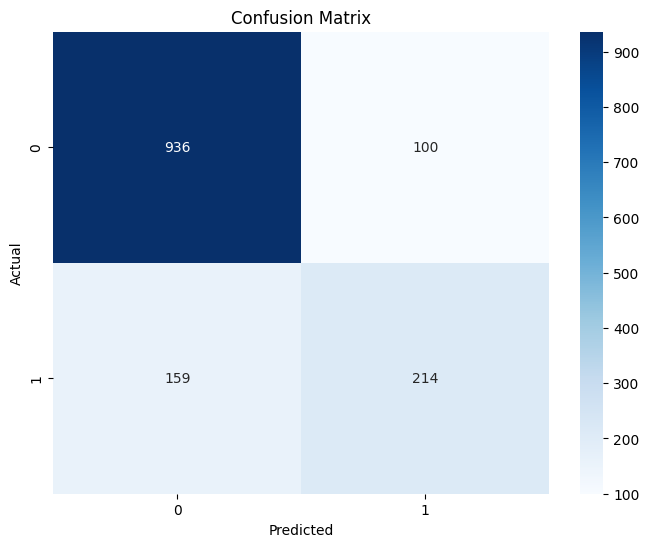

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Define the parameter grid to search
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 0.5, 1.0],
}

# Initialize the SGD Classifier
sgd = SGDClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_lda, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_sgd_model = SGDClassifier(**best_params)

# Train the final model on the entire training set
best_sgd_model.fit(x_train_lda, y_train)

# Predict on the test set
y_pred_sgd = best_sgd_model.predict(x_test_lda)

# Evaluate the performance of the model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_sgd))

# Create a heatmap of the confusion matrix
cm = confusion_matrix(y_test, y_pred_sgd)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# K-Fold Cross Validation:


from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_sgd_model, x_train_lda, y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation accuracy scores:", cv_scores)

# Print the mean and standard deviation of the F1 scores
print("Mean accuracy score:", cv_scores.mean())
print("Standard deviation of accuracy score:", cv_scores.std())



Cross-validation accuracy scores: [0.78014184 0.81382979 0.82446809 0.80141844 0.78685613 0.78863233
 0.80284192 0.80284192 0.81172291 0.78863233]
Mean accuracy score: 0.8001385687111849
Standard deviation of accuracy score: 0.013307537607243779


# Support Vector Machine:

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



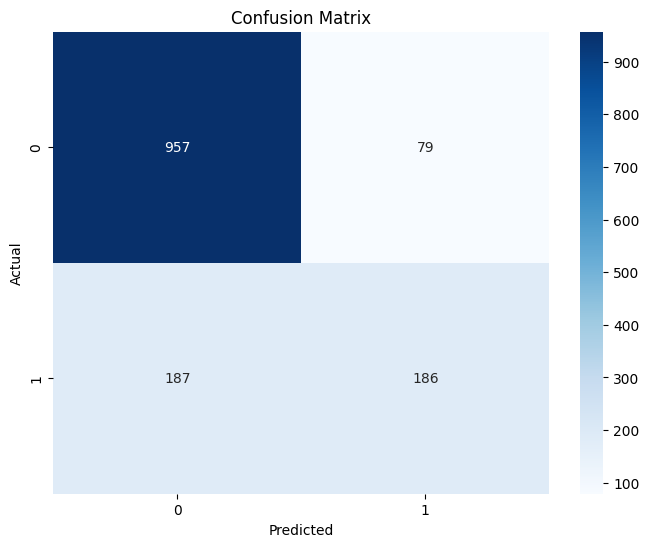

In [23]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine Classifier
svm = SVC()

# Train the model on the training set
svm.fit(x_train_lda, y_train)

# Predict on the test set
y_pred_svm = svm.predict(x_test_lda)

# Predict and Evaluate New Result with test set
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_svm))

# Create a heatmap of Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# K-Fold Cross Validation:


from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_svm_model, x_train_lda, y_train, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation accuracy scores:", cv_scores)

# Print the mean and standard deviation of the F1 scores
print("Mean accuracy score:", cv_scores.mean())
print("Standard deviation of accuracy score:", cv_scores.std())



# Model Selection and Saving:

Here, we choose the Random Forest Model based on the highest recall and F1-score.

In [24]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [25]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [28]:
import joblib

final_model_dict = {'Numeric Columns': numerical_columns,
                    'Categorical Columns': categorical_columns,
                    'Column Transformer': preprocessor,
                    'Model': best_lgr_model}

joblib.dump(final_model_dict, 'Telecom Customer Churn Predictor Model.joblib')

['Telecom Customer Churn Predictor Model.joblib']

# Load the Model:


In [29]:
my_model = joblib.load('Telecom Customer Churn Predictor Model.joblib')
my_model

{'Numeric Columns': Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object'),
 'Categorical Columns': Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'),
 'Column Transformer': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                 ('cat', OneHotEncoder(drop='first'),
                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'Paymen

In [30]:
categorical_columns = my_model['Categorical Columns']
numerical_columns = my_model['Numeric Columns']
preprocessor = my_model['Column Transformer']

model = my_model['Model']